<a href="https://colab.research.google.com/github/jcaicedot/Diplomado/blob/master/Calidad_aire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis cálidad del aire en Bogotá

In [ ]:
pip install geocoder

     |████████████████████████████████| 102kB 3.8MB/s 


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import folium #mapa
from folium import plugins #mapa
import ipywidgets #mapa
import geocoder #mapa
import geopy #mapa

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
T1=pd.read_csv("/content/drive/MyDrive/Maestria MAD/1 Semestre/Programación MAD/Estudiantes/Shamir Churio/Datos/DATOS_DE_CALIDAD_DEL_AIRE_EN_COLOMBIA_2011-2018.csv")

T1.columns

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['Fecha', 'Autoridad Ambiental', 'Nombre de la estación', 'Tecnología',
       'Latitud', 'Longitud', 'Código del departamento', 'Departamento',
       'Código del municipio', 'Nombre del municipio', 'Tipo de estación',
       'Tiempo de exposición', 'Variable', 'Unidades', 'Concentración',
       'Nueva columna georreferenciada'],
      dtype='object')

### Exploración de variables

In [ ]:
T1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20389245 entries, 0 to 20389244
Data columns (total 16 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   Fecha                           object 
 1   Autoridad Ambiental             object 
 2   Nombre de la estación           object 
 3   Tecnología                      object 
 4   Latitud                         float64
 5   Longitud                        float64
 6   Código del departamento         float64
 7   Departamento                    object 
 8   Código del municipio            float64
 9   Nombre del municipio            object 
 10  Tipo de estación                object 
 11  Tiempo de exposición            int64  
 12  Variable                        object 
 13  Unidades                        object 
 14  Concentración                   float64
 15  Nueva columna georreferenciada  object 
dtypes: float64(5), int64(1), object(10)
memory usage: 2.4+ GB


In [ ]:
T1.sample(10)

,Fecha,Autoridad Ambiental,Nombre de la estación,Tecnología,Latitud,Longitud,Código del departamento,Departamento,Código del municipio,Nombre del municipio,Tipo de estación,Tiempo de exposición,Variable,Unidades,Concentración,Nueva columna georreferenciada
8670889,14/12/2011 01:00:00 p. m.,DAGMA,La Flora,Automática,3.490514,-76.521225,76.0,VALLE DEL CAUCA,76001.0,CALI,Fija,1,Precipitación Líquida,mm,0.000000,"(3.490514, -76.521225)"
17360383,24/07/2018 00:00,AMVA,SUR-Tráfico Sur,NaN,6.152313,-75.627487,5.0,ANTIOQUIA,5631.0,SABANETA,Fija,1,Precipitación Líquida,mm,0.000000,"(6.1523128, -75.6274872)"
14478080,18/03/2014 11:00:00 p. m.,SDA,Suba,Automática,4.761350,-74.093483,11.0,CUNDINAMARCA,11001.0,BOGOTÁ. D.C.,Fija,1,PM2.5,µg/m3,47.000000,"(4.76135, -74.093483)"
10016883,02/08/2012 06:00:00 a. m.,SDA,C. Alto Rendimiento,Automática,4.658467,-74.083967,11.0,CUNDINAMARCA,11001.0,BOGOTÁ. D.C.,Fija,1,SO2,µg/m3,5.774812,"(4.658467, -74.083967)"
19703612,09/07/2018 01:00,EPA Barranquilla Verde,Tres Ave Marías,NaN,11.014900,-74.807300,8.0,ATLÁNTICO,8001.0,BARRANQUILLA,Fija,1,Dirección del Viento,deg,50.670000,"(11.0149, -74.8073)"
10978411,17/10/2013 05:00:00 p. m.,SDA,Guaymaral,Automática,4.783733,-74.043783,11.0,CUNDINAMARCA,11001.0,BOGOTÁ. D.C.,Fija,1,Dirección del Viento,°,135.000000,"(4.783733, -74.043783)"
2466548,15/10/2017 08:00:00 a. m.,AMVA,ITA-Col. Concejo,Automática,6.171250,-75.647694,5.0,ANTIOQUIA,5360.0,ITAGÜÍ,Fija,1,O3,µg/m3,10.005955,"(6.17125, -75.647694)"
18665343,28/01/2018 22:00,CORPOBOYACA,Móvil Juan José Rondón,NaN,5.741111,-72.906131,15.0,BOYACÁ,15759.0,SOGAMOSO,Fija,1,PM10,ugm3,NaN,"(5.741111, -72.906131)"
8603990,13/03/2013 04:00:00 p. m.,DAGMA,La Flora,Automática,3.490514,-76.521225,76.0,VALLE DEL CAUCA,76001.0,CALI,Fija,1,Dirección del Viento,°,280.400000,"(3.490514, -76.521225)"
10200950,14/02/2014 01:00:00 a. m.,SDA,Carvajal - Sevillana,Automática,4.595617,-74.148583,11.0,CUNDINAMARCA,11001.0,BOGOTÁ. D.C.,Fija,1,CO,µg/m3,915.904556,"(4.595617, -74.148583)"


In [ ]:
renombrar_columnas=['Fecha', 'Autoridad_Ambiental', 'Nombre_de_la_estacion', 'Tecnologia',
       'Latitud', 'Longitud', 'Codigo_del_departamento', 'Departamento',
       'Codigo_del_municipio', 'Nombre_del_municipio', 'Tipo_de_estacion',
       'Tiempo_de_exposicion', 'Variable', 'Unidades', 'Concentracion',
       'Nueva_columna_georreferenciada']

T1.columns=renombrar_columnas

In [ ]:
T2= (T1[(T1.Departamento=='CUNDINAMARCA')& (T1.Codigo_del_municipio==11001.0)])
T3=T2.drop(["Autoridad_Ambiental","Tecnologia","Latitud","Longitud","Codigo_del_departamento","Departamento","Codigo_del_municipio","Nombre_del_municipio"], axis=1) # Se eliminan variables para determinar un mejor analisis

In [ ]:
T3.shape
T3.tail()


,Fecha,Nombre_de_la_estacion,Tipo_de_estacion,Tiempo_de_exposicion,Variable,Unidades,Concentracion,Nueva_columna_georreferenciada
20389240,27/12/2018 00:00,Usaquén,Fija,24,PM2.5,ugm3,8.08,"(4.71035, -74.030417)"
20389241,28/12/2018 00:00,Usaquén,Fija,24,PM2.5,ugm3,6.87,"(4.71035, -74.030417)"
20389242,29/12/2018 00:00,Usaquén,Fija,24,PM2.5,ugm3,7.50,"(4.71035, -74.030417)"
20389243,30/12/2018 00:00,Usaquén,Fija,24,PM2.5,ugm3,8.54,"(4.71035, -74.030417)"
20389244,31/12/2018 00:00,Usaquén,Fija,24,PM2.5,ugm3,NaN,"(4.71035, -74.030417)"


## Tabla Indice calidad del aire ICA en Colombia 

In [ ]:
from google.colab import files
from IPython.display import Image

uploaded = files.upload()

Saving Indice calidad del aire ICA en Colombia.JPG to Indice calidad del aire ICA en Colombia.JPG


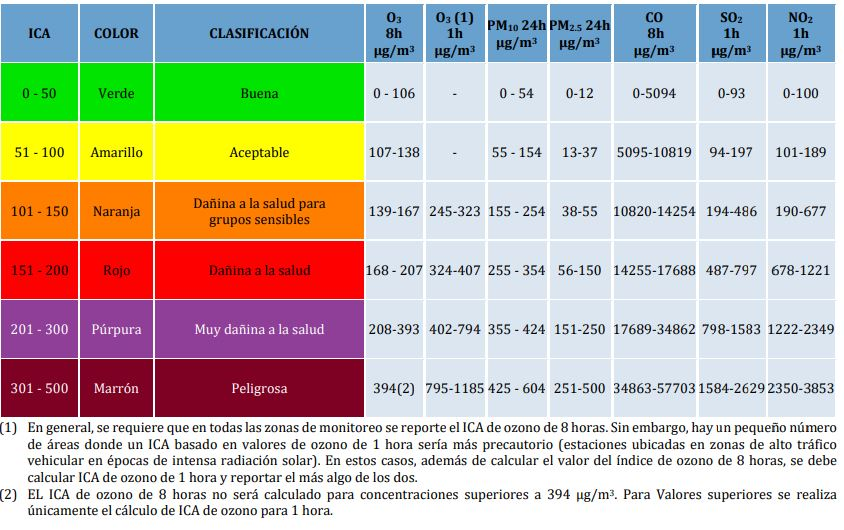

In [ ]:
Image("Indice calidad del aire ICA en Colombia.JPG")

## Datos por estaciones de Bogotá

In [ ]:
T4=T3.groupby("Nombre_de_la_estacion")["Tipo_de_estacion"].count()
T4=pd.DataFrame(T4)
T4.columns=["Cantidad"]
T4=T4.sort_values(by=["Cantidad"], ascending=False)
T4

,Cantidad
Nombre_de_la_estacion,
C. Alto Rendimiento,746117
Kennedy,742922
Tunal,693396
Las Ferias,689398
Guaymaral,638781
Carvajal - Sevillana,611026
Puente Aranda,607805
San Cristóbal,538621
Suba,512284


## Localización estaciones en Bogotá

In [ ]:
UBI=T2.groupby("Nombre_de_la_estacion").agg({"Latitud":"max", "Longitud":"max"})
UBI["Ciudad"]="Bogotá"
UBI=pd.DataFrame(UBI)
UBI=UBI.reset_index()
UBI

,Nombre_de_la_estacion,Latitud,Longitud,Ciudad
0,Bogotá-Mochuelo,4.530214,-74.142217,Bogotá
1,Bolivia,4.735867,-74.125883,Bogotá
2,C. Alto Rendimiento,4.658467,-74.083967,Bogotá
3,Carvajal - Sevillana,4.595617,-74.148583,Bogotá
4,Fontibón,4.670100,-74.141550,Bogotá
5,Guaymaral,4.783733,-74.043783,Bogotá
6,Kennedy,4.625050,-74.161333,Bogotá
7,Las Ferias,4.690700,-74.082483,Bogotá
8,MinAmbiente,4.625550,-74.066867,Bogotá
9,Puente Aranda,4.631767,-74.117483,Bogotá


In [ ]:
#Crear mapa
Map_est=folium.Map(location=[4.60971, -74.08175], zoom_start=11)

#Marcar los puntos
for (index, row) in UBI.iterrows():
  folium.Marker(location=[row.loc["Latitud"], row.loc["Longitud"]],
                popup=row.loc["Nombre_de_la_estacion"] + "  " +row.loc["Ciudad"] ,
                tooltip ="Clic").add_to(Map_est)

Map_est

## Análisis variable 03 (Ozono Troposférico) tiempo de exposición igual a 1 hora en Bogotá

Para analizar está variable se toman los valores máximos, en tiempo de exposición de 1 hora

In [ ]:
B1O3=T3[(T3["Variable"]=="O3")&(T2["Tiempo_de_exposicion"]==1)]
B1O3["Fecha"]=pd.to_datetime(B1O3["Fecha"]) # Cambio de tipo de dato a fecha
B1O3["Año"]=B1O3["Fecha"].dt. year
B1O3F = B1O3.pivot_table(index=['Nombre_de_la_estacion',], columns='Año', values=['Concentracion'], aggfunc="max", margins='All')
B1O3F=B1O3F[:-1]
B1O3F


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Concentracion              ...                        
Año                            2011        2012  ...        2017         All
Nombre_de_la_estacion                            ...                        
C. Alto Rendimiento      176.837267  160.559606  ...  133.805121  178.145235
Carvajal - Sevillana     113.466219  100.102057  ...  130.665998  136.551854
Fontibón                 120.006059  128.635378  ...         NaN  164.526018
Guaymaral                165.032856  157.080411  ...  140.671953  194.429436
Kennedy                         NaN         NaN  ...  127.723070  155.386592
Las Ferias               180.761170  160.912757  ...   89.072617  180.761170
MinAmbiente              159.016203  192.039124  ...  150.481713  192.039124
Puente Aranda            131.483478  116.340479  ...  112.223650  131.483478
San Cristóbal            101.596410  122.880319  ...   95.547059  303.513963
Suba                     156.988853  145.495085  ...  159.310496  216.991883
Tunal                    139.363985  103.362167  ...  119.875263  139.363985
Usaquén                  205.808757  144.147878  ...  152.639860  228.763594

[12 rows x 8 columns]

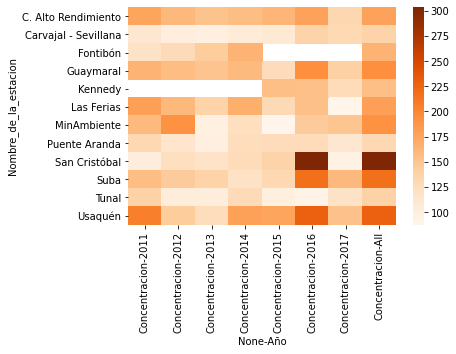

In [ ]:
sns.heatmap(B1O3F,cmap = "Oranges")

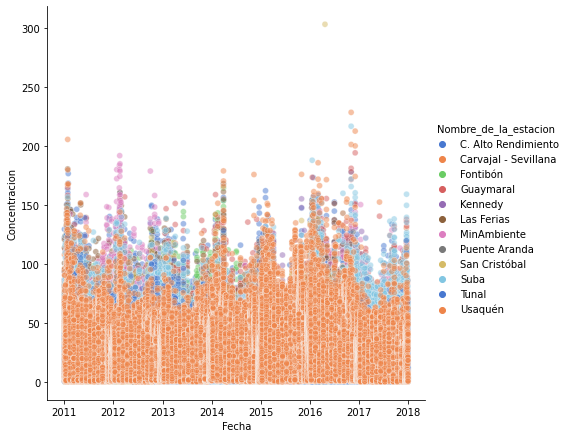

In [ ]:
sns.relplot(x="Fecha", y="Concentracion", hue="Nombre_de_la_estacion",
            sizes=(100, 400), alpha=.5, palette="muted",
            height=6, data=B1O3)

## Análisis variable 03 (Ozono Troposférico)  tiempo de exposición igual 8 horas en Bogotá

Para analizar está variable se toman los valores máximos de O3 y el tiempo de exposición de 8 horas

In [ ]:
BO3=T3[(T3["Variable"]=="O3")&(T3["Tiempo_de_exposicion"]==8)]
BO3["Fecha"]=pd.to_datetime(BO3["Fecha"]) # Cambio de tipo de dato a fecha
BO3["Año"]=BO3["Fecha"].dt.year
BO3F = BO3.pivot_table(index=['Nombre_de_la_estacion',], columns='Año', values=['Concentracion'], aggfunc="max", margins='All')
BO3F

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Concentracion       
Año                            2018    All
Nombre_de_la_estacion                     
C. Alto Rendimiento           105.4  105.4
Carvajal - Sevillana           79.6   79.6
Guaymaral                      91.7   91.7
Kennedy                        88.8   88.8
Las Ferias                     81.2   81.2
MinAmbiente                   106.5  106.5
Puente Aranda                  72.1   72.1
Suba                          117.5  117.5
Tunal                          92.7   92.7
Usaquén                        87.4   87.4
All                           117.5  117.5

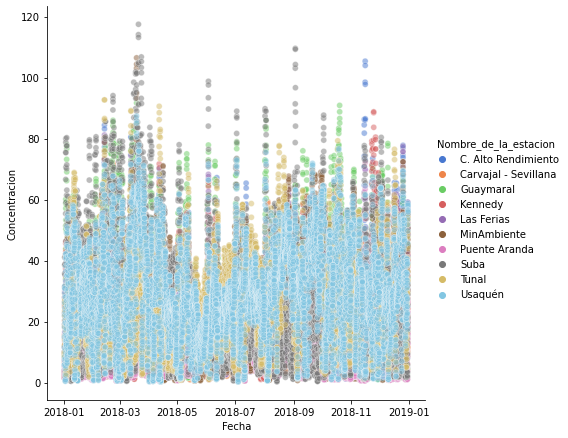

In [ ]:
sns.relplot(x="Fecha", y="Concentracion", hue="Nombre_de_la_estacion",
            sizes=(100, 400), alpha=.5, palette="muted",
            height=6, data=BO3)

## Análisis variable PM2.5 (Particulas menores a 2.5 micras) tiempo de exposición igual a 24 horas en Bogotá

Para analizar está variable se toman los valores máximos de PM2.5 y el tiempo de exposición de 24 horas

In [ ]:
BPM2=T3[(T3["Variable"]=="PM2.5")&(T3["Tiempo_de_exposicion"]==24)]
BPM2["Fecha"]=pd.to_datetime(BPM2["Fecha"]) # Cambio de tipo de dato a fecha
BPM2["Año"]=BPM2["Fecha"].dt.year
BPM2F = BPM2.pivot_table(index=['Nombre_de_la_estacion',], columns='Año', values=['Concentracion'], aggfunc="max", margins='All')
BPM2F

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Concentracion       
Año                            2018    All
Nombre_de_la_estacion                     
Bogotá-Mochuelo               53.29  53.29
C. Alto Rendimiento           35.95  35.95
Carvajal - Sevillana          57.05  57.05
Guaymaral                     36.75  36.75
Kennedy                       54.09  54.09
Las Ferias                    37.36  37.36
MinAmbiente                   43.46  43.46
Puente Aranda                 41.69  41.69
San Cristóbal                 38.68  38.68
Suba                          41.12  41.12
Tunal                         56.19  56.19
Usaquén                       39.92  39.92
All                           57.05  57.05

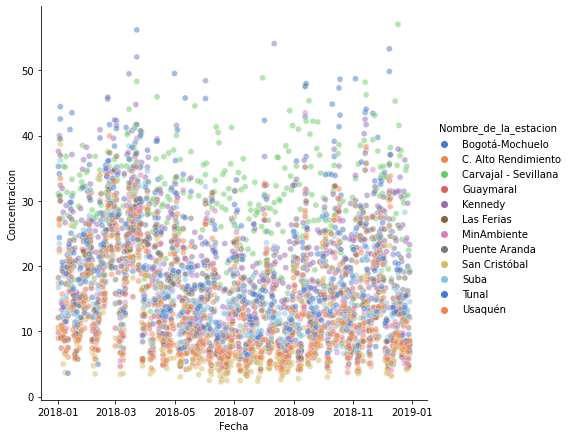

In [ ]:
sns.relplot(x="Fecha", y="Concentracion", hue="Nombre_de_la_estacion",
            sizes=(100, 400), alpha=.5, palette="muted",
            height=6, data=BPM2)

## Análisis variable PM10 (Particulas menores a 10 micras) tiempo de exposición igual a 24 horas en Bogotá

In [ ]:
BPM1=T3[(T3["Variable"]=="PM10")&(T3["Tiempo_de_exposicion"]==24)]
BPM1["Fecha"]=pd.to_datetime(BPM1["Fecha"]) # Cambio de tipo de dato a fecha
BPM1["Año"]=BPM1["Fecha"].dt.year
BPM1F = BPM1.pivot_table(index=['Nombre_de_la_estacion',], columns='Año', values=['Concentracion'], aggfunc="max", margins='All')
BPM1F de

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Concentracion                                           
Año                            2011   2012   2013   2014  2015    2018     All
Nombre_de_la_estacion                                                         
Bogotá-Mochuelo               78.61  64.75  95.76  98.44  94.4  119.43  119.43
C. Alto Rendimiento             NaN    NaN    NaN    NaN   NaN   67.20   67.20
Carvajal - Sevillana            NaN    NaN    NaN    NaN   NaN  136.45  136.45
Guaymaral                       NaN    NaN    NaN    NaN   NaN   63.29   63.29
Kennedy                         NaN    NaN    NaN    NaN   NaN   92.59   92.59
Las Ferias                      NaN    NaN    NaN    NaN   NaN   78.17   78.17
MinAmbiente                     NaN    NaN    NaN    NaN   NaN   63.41   63.41
Puente Aranda                   NaN    NaN    NaN    NaN   NaN   95.74   95.74
San Cristóbal                   NaN    NaN    NaN    NaN   NaN   55.07   55.07
Suba                            NaN    NaN    NaN    NaN   NaN   82.17   82.17
Tunal                           NaN    NaN    NaN    NaN   NaN   91.04   91.04
Usaquén                         NaN    NaN    NaN    NaN   NaN   84.76   84.76
All                           78.61  64.75  95.76  98.44  94.4  136.45  136.45

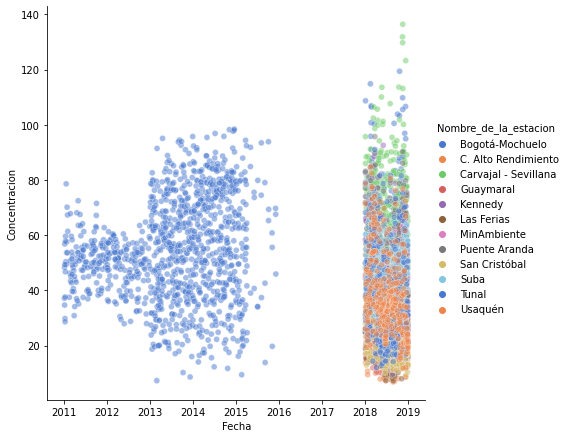

In [ ]:
sns.relplot(x="Fecha", y="Concentracion", hue="Nombre_de_la_estacion",
            sizes=(100, 400), alpha=.5, palette="muted",
            height=6, data=BPM1)

## Análisis variable CO (Monóxido de carbono) tiempo de exposición igual a 8 horas en Bogotá

In [ ]:
BCO=T3[(T3["Variable"]=="CO")&(T3["Tiempo_de_exposicion"]==8)]
BCO["Fecha"]=pd.to_datetime(BCO["Fecha"]) # Cambio de tipo de dato a fecha
BCO["Año"]=BCO["Fecha"].dt.year
BCOF = BCO.pivot_table(index=['Nombre_de_la_estacion',], columns='Año', values=['Concentracion'], aggfunc="max", margins='All')
BCOF

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Concentracion        
Año                            2018     All
Nombre_de_la_estacion                      
C. Alto Rendimiento          4407.8  4407.8
Carvajal - Sevillana         2976.7  2976.7
Kennedy                      2347.0  2347.0
Las Ferias                   2776.3  2776.3
Puente Aranda                3189.3  3189.3
San Cristóbal                  65.0    65.0
Tunal                        2647.5  2647.5
Usaquén                      2447.2  2447.2
All                          4407.8  4407.8

## Análisis variable SO2 (Dióxido de azufre) tiempo de exposición igual a 1 hora en Bogotá

In [ ]:
BSO=T3[(T3["Variable"]=="SO2")&(T3["Tiempo_de_exposicion"]==1)]
BSO["Fecha"]=pd.to_datetime(BSO["Fecha"]) # Cambio de tipo de dato a fecha
BSO["Año"]=BSO["Fecha"].dt.year
BSOF = BSO.pivot_table(index=['Nombre_de_la_estacion',], columns='Año', values=['Concentracion'], aggfunc="max", margins='All')
BSOF

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Concentracion              ...                        
Año                            2011        2012  ...        2018         All
Nombre_de_la_estacion                            ...                        
Bogotá-Mochuelo                 NaN         NaN  ...  186.347500  388.644250
C. Alto Rendimiento       38.642303   60.908317  ...   47.400000   80.130188
Carvajal - Sevillana     172.266810  113.356275  ...  167.330686  575.051935
Fontibón                  53.744836  119.682972  ...         NaN  203.633676
Kennedy                   76.114950  130.955325  ...   59.704846  258.000874
Las Ferias                39.035098   33.719272  ...         NaN   45.516216
Puente Aranda             67.757144   48.718499  ...   36.399007   67.757144
San Cristóbal             23.545880   79.135107  ...         NaN   79.135107
Suba                      85.572581   97.046875  ...   98.696300  136.535555
Tunal                    142.815911   92.420308  ...   42.945591  142.815911
All                      172.266810  130.955325  ...  186.347500  575.051935

[11 rows x 9 columns]

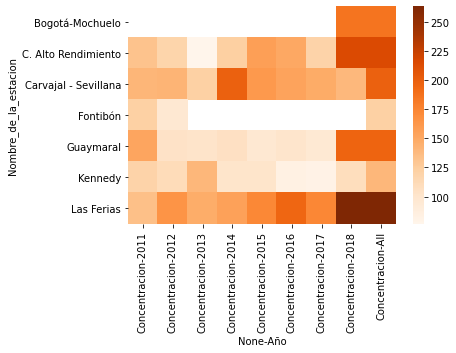

In [ ]:
BSOF=BSOF[:-1]
sns.heatmap(BSOF,cmap = "Oranges")

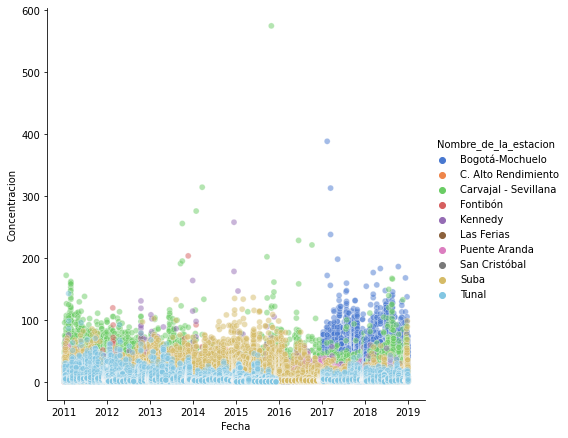

In [ ]:
sns.relplot(x="Fecha", y="Concentracion", hue="Nombre_de_la_estacion",
            sizes=(100, 400), alpha=.5, palette="muted",
            height=6, data=BSO)

## Análisis variable NO2 (Dióxido de nitrógeno) tiempo de exposición igual a 1 hora en Bogotá

In [ ]:
BNO=T3[(T3["Variable"]=="NO2")&(T3["Tiempo_de_exposicion"]==1)]
BNO["Fecha"]=pd.to_datetime(BNO["Fecha"]) # Cambio de tipo de dato a fecha
BNO["Año"]=BNO["Fecha"].dt.year
BNOF = BNO.pivot_table(index=['Nombre_de_la_estacion',], columns='Año', values=['Concentracion'], aggfunc="max", margins='All')
BNOF

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Concentracion              ...                        
Año                            2011        2012  ...        2018         All
Nombre_de_la_estacion                            ...                        
Bogotá-Mochuelo                 NaN         NaN  ...  186.393381  186.393381
C. Alto Rendimiento      132.559130  118.994071  ...  214.935340  214.935340
Carvajal - Sevillana     141.624149  143.030098  ...  139.717373  199.114495
Fontibón                 122.367096   97.165943  ...         NaN  122.367096
Guaymaral                152.918127  104.107934  ...  196.883028  196.883028
Kennedy                  120.060411  111.435418  ...  108.878007  140.334787
Las Ferias               134.392568  165.156717  ...  263.262884  263.262884
Puente Aranda            174.725069  130.500038  ...  259.690030  259.690030
Suba                     150.225950   96.031405  ...         NaN  150.225950
Tunal                    151.200650  137.159962  ...  110.570411  288.836993
All                      174.725069  165.156717  ...  263.262884  288.836993

[11 rows x 9 columns]

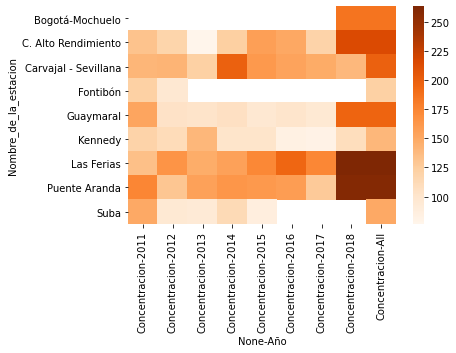

In [ ]:
BNOF=BNOF[:-1]
sns.heatmap(BNOF,cmap = "Oranges")

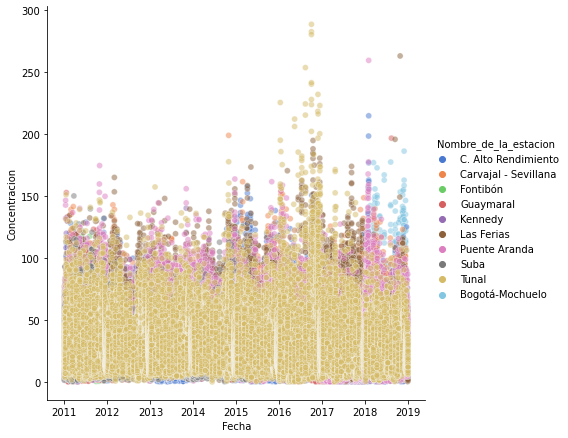

In [ ]:
sns.relplot(x="Fecha", y="Concentracion", hue="Nombre_de_la_estacion",
            sizes=(100, 400), alpha=.5, palette="muted",
            height=6, data=BSO)

## Análisis estación Kennedy

In [ ]:
Analisis_k=(T2[(T2.Nombre_de_la_estacion=="Kennedy")])
Analisis_k=Analisis_k.drop(["Autoridad_Ambiental","Latitud","Longitud","Codigo_del_departamento","Departamento","Codigo_del_municipio","Nombre_del_municipio","Nueva_columna_georreferenciada"], axis=1)
Analisis_k

,Fecha,Nombre_de_la_estacion,Tecnologia,Tipo_de_estacion,Tiempo_de_exposicion,Variable,Unidades,Concentracion
11558280,01/01/2011 01:00:00 a. m.,Kennedy,Automática,Fija,1,CO,µg/m3,528.553292
11558281,01/01/2011 02:00:00 a. m.,Kennedy,Automática,Fija,1,CO,µg/m3,484.666123
11558282,01/01/2011 03:00:00 a. m.,Kennedy,Automática,Fija,1,CO,µg/m3,414.065223
11558283,01/01/2011 04:00:00 a. m.,Kennedy,Automática,Fija,1,CO,µg/m3,394.983840
11558284,01/01/2011 05:00:00 a. m.,Kennedy,Automática,Fija,1,CO,µg/m3,574.348520
...,...,...,...,...,...,...,...,...
20067675,27/12/2018 00:00,Kennedy,NaN,Fija,24,SO2,ugm3,6.630000
20067676,28/12/2018 00:00,Kennedy,NaN,Fija,24,SO2,ugm3,5.970000
20067677,29/12/2018 00:00,Kennedy,NaN,Fija,24,SO2,ugm3,4.160000
20067678,30/12/2018 00:00,Kennedy,NaN,Fija,24,SO2,ugm3,5.430000


In [ ]:
Analisis_k["Fecha"]=pd.to_datetime(Analisis_k["Fecha"]) # Cambio de tipo de dato a fecha

In [ ]:
Analisis_k.groupby("Variable")["Tipo_de_estacion"].count()

Variable
CO                        65930
Dirección del Viento      54667
Humedad Relativa           8651
Humedad Relativa 2 m      49536
NO                        36223
NO2                       52798
O3                        31095
PM10                      65519
PM2.5                     65470
Precipitación Líquida     49016
Presión Atmosférica       50388
Radiación Solar Global    49840
SO2                       48569
Temperatura a 2 m         58189
Velocidad del Viento      57031
Name: Tipo_de_estacion, dtype: int64

In [ ]:
Analisis_k.groupby("Unidades")["Tipo_de_estacion"].count()

Unidades
%         58187
W/m2      49840
m/s       57031
mm        49016
mm Hg     50388
ugm3      62415
°         54667
°C        58189
µg/m3    303189
Name: Tipo_de_estacion, dtype: int64

### Análisis variable CO (Monóxido de carbono)

De acuerdo a la tabla Indice calidad del aire ICA en Colombia se van a analizar los datos de CO  donde el tiempo de exposición sea de 8 horas.

In [ ]:
CO = Analisis_k[(Analisis_k['Variable'] == "CO")&(Analisis_k['Tiempo_de_exposicion'] == 8)] # Filtrar por la variable CO
DFceo= CO[CO.Concentracion.notnull()] # no se tienen en cuenta los valores nulos
DFceo

,Fecha,Nombre_de_la_estacion,Tecnologia,Tipo_de_estacion,Tiempo_de_exposicion,Variable,Unidades,Concentracion
20014032,2018-01-01 07:00:00,Kennedy,NaN,Fija,8,CO,ugm3,858.7
20014033,2018-01-01 08:00:00,Kennedy,NaN,Fija,8,CO,ugm3,866.8
20014034,2018-01-01 09:00:00,Kennedy,NaN,Fija,8,CO,ugm3,830.0
20014035,2018-01-01 10:00:00,Kennedy,NaN,Fija,8,CO,ugm3,801.4
20014036,2018-01-01 11:00:00,Kennedy,NaN,Fija,8,CO,ugm3,744.2
...,...,...,...,...,...,...,...,...
20022759,2018-12-30 22:00:00,Kennedy,NaN,Fija,8,CO,ugm3,586.8
20022760,2018-12-30 23:00:00,Kennedy,NaN,Fija,8,CO,ugm3,601.1
20022761,2018-12-31 00:00:00,Kennedy,NaN,Fija,8,CO,ugm3,615.4
20022762,2018-12-31 01:00:00,Kennedy,NaN,Fija,8,CO,ugm3,621.5


In [ ]:
DFceo.describe()

,Tiempo_de_exposicion,Concentracion
count,8497.0,8497.000000
mean,8.0,926.273838
std,0.0,288.316583
min,8.0,229.000000
25%,8.0,715.600000
50%,8.0,883.200000
75%,8.0,1087.600000
max,8.0,2347.000000


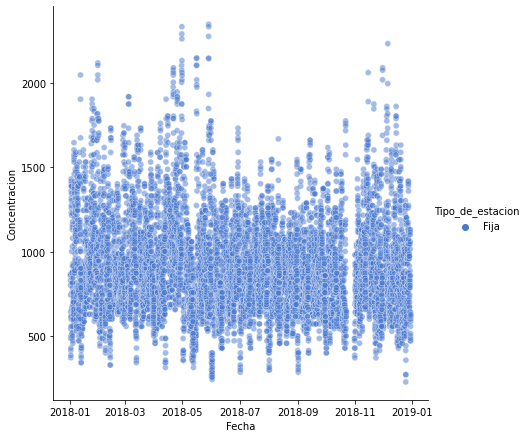

In [ ]:
sns.relplot(x="Fecha", y="Concentracion", hue="Tipo_de_estacion",
            sizes=(100, 400), alpha=.5, palette="muted",
            height=6, data=DFceo)

### Análisis variable PM2.5

In [ ]:
PM = Analisis_k[(Analisis_k['Variable'] == "PM2.5") & (Analisis_k['Tiempo_de_exposicion'] == 24)]
DFPM2=PM[PM.Concentracion.notnull()] # no se tienen en cuenta los valores nulos
DFPM2

,Fecha,Nombre_de_la_estacion,Tecnologia,Tipo_de_estacion,Tiempo_de_exposicion,Variable,Unidades,Concentracion
20058190,2018-01-01,Kennedy,NaN,Fija,24,PM2.5,ugm3,37.57
20058191,2018-02-01,Kennedy,NaN,Fija,24,PM2.5,ugm3,26.38
20058192,2018-03-01,Kennedy,NaN,Fija,24,PM2.5,ugm3,27.46
20058193,2018-04-01,Kennedy,NaN,Fija,24,PM2.5,ugm3,33.61
20058194,2018-05-01,Kennedy,NaN,Fija,24,PM2.5,ugm3,25.62
...,...,...,...,...,...,...,...,...
20058549,2018-12-26,Kennedy,NaN,Fija,24,PM2.5,ugm3,23.79
20058550,2018-12-27,Kennedy,NaN,Fija,24,PM2.5,ugm3,24.29
20058551,2018-12-28,Kennedy,NaN,Fija,24,PM2.5,ugm3,29.62
20058552,2018-12-29,Kennedy,NaN,Fija,24,PM2.5,ugm3,21.58


In [ ]:
DFPM2.describe()

,Tiempo_de_exposicion,Concentracion
count,359.0,359.000000
mean,24.0,24.203064
std,0.0,8.168424
min,24.0,8.140000
25%,24.0,18.380000
50%,24.0,22.950000
75%,24.0,28.760000
max,24.0,54.090000


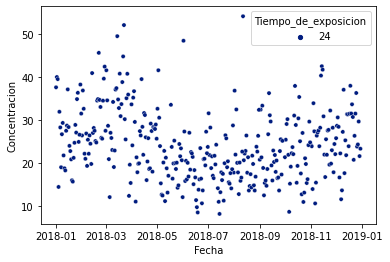

In [ ]:
sns.scatterplot(data=DFPM2, x="Fecha", y="Concentracion", hue="Tiempo_de_exposicion",size="Tiempo_de_exposicion",palette="dark")


### Análisis variable PM10

In [ ]:
PM10 = Analisis_k[(Analisis_k['Variable'] == "PM10")&(Analisis_k['Tiempo_de_exposicion'] == 24)]
DFPM1=PM10[PM10.Concentracion.notnull()] # no se tienen en cuenta los valores nulos
DFPM1

,Fecha,Nombre_de_la_estacion,Tecnologia,Tipo_de_estacion,Tiempo_de_exposicion,Variable,Unidades,Concentracion
20049065,2018-01-01,Kennedy,NaN,Fija,24,PM10,ugm3,58.36
20049066,2018-02-01,Kennedy,NaN,Fija,24,PM10,ugm3,43.26
20049067,2018-03-01,Kennedy,NaN,Fija,24,PM10,ugm3,57.80
20049068,2018-04-01,Kennedy,NaN,Fija,24,PM10,ugm3,66.07
20049069,2018-05-01,Kennedy,NaN,Fija,24,PM10,ugm3,54.52
...,...,...,...,...,...,...,...,...
20049424,2018-12-26,Kennedy,NaN,Fija,24,PM10,ugm3,45.15
20049425,2018-12-27,Kennedy,NaN,Fija,24,PM10,ugm3,43.98
20049426,2018-12-28,Kennedy,NaN,Fija,24,PM10,ugm3,50.33
20049427,2018-12-29,Kennedy,NaN,Fija,24,PM10,ugm3,35.63


In [ ]:
DFPM1.describe()

,Tiempo_de_exposicion,Concentracion
count,351.0,351.000000
mean,24.0,50.283305
std,0.0,13.370160
min,24.0,22.400000
25%,24.0,40.435000
50%,24.0,48.370000
75%,24.0,59.165000
max,24.0,92.590000


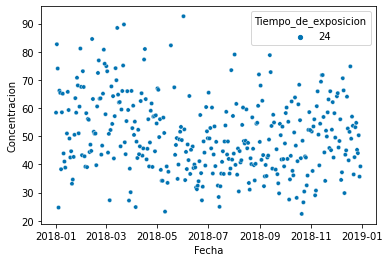

In [ ]:
sns.scatterplot(data=DFPM1, x="Fecha", y="Concentracion", hue="Tiempo_de_exposicion",size="Tiempo_de_exposicion",palette="colorblind")

### Análisis variable O3

In [ ]:
O3 = Analisis_k[(Analisis_k['Variable'] == "O3")& (Analisis_k['Tiempo_de_exposicion'] == 8)]
DFO3=O3[O3.Concentracion.notnull()] # no se tienen en cuenta los valores nulos
DFO3

,Fecha,Nombre_de_la_estacion,Tecnologia,Tipo_de_estacion,Tiempo_de_exposicion,Variable,Unidades,Concentracion
20031552,2018-01-01 07:00:00,Kennedy,NaN,Fija,8,O3,ugm3,1.5
20031553,2018-01-01 08:00:00,Kennedy,NaN,Fija,8,O3,ugm3,1.6
20031554,2018-01-01 09:00:00,Kennedy,NaN,Fija,8,O3,ugm3,1.8
20031555,2018-01-01 10:00:00,Kennedy,NaN,Fija,8,O3,ugm3,2.0
20031556,2018-01-01 11:00:00,Kennedy,NaN,Fija,8,O3,ugm3,2.5
...,...,...,...,...,...,...,...,...
20040279,2018-12-30 22:00:00,Kennedy,NaN,Fija,8,O3,ugm3,32.3
20040280,2018-12-30 23:00:00,Kennedy,NaN,Fija,8,O3,ugm3,30.2
20040281,2018-12-31 00:00:00,Kennedy,NaN,Fija,8,O3,ugm3,27.4
20040282,2018-12-31 01:00:00,Kennedy,NaN,Fija,8,O3,ugm3,25.6


In [ ]:
DFO3.describe()

,Tiempo_de_exposicion,Concentracion
count,6440.0,6440.000000
mean,8.0,17.859658
std,0.0,13.127555
min,8.0,1.000000
25%,8.0,7.900000
50%,8.0,14.300000
75%,8.0,24.700000
max,8.0,88.800000


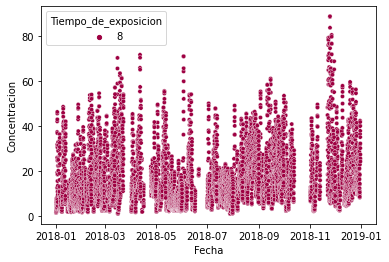

In [ ]:
sns.scatterplot(data=DFO3, x="Fecha", y="Concentracion", hue="Tiempo_de_exposicion",size="Tiempo_de_exposicion",palette="Spectral")

### Análisis variable SO2

In [ ]:
SO2 = Analisis_k[(Analisis_k['Variable'] == "O3")& (Analisis_k['Tiempo_de_exposicion'] == 1)]
DFSO2=SO2[SO2.Concentracion.notnull()] # no se tienen en cuenta los valores nulos
DFSO2

,Fecha,Nombre_de_la_estacion,Tecnologia,Tipo_de_estacion,Tiempo_de_exposicion,Variable,Unidades,Concentracion
11799807,2015-01-01 01:00:00,Kennedy,Automática,Fija,1,O3,µg/m3,17.657567
11799808,2015-01-01 02:00:00,Kennedy,Automática,Fija,1,O3,µg/m3,20.011910
11799809,2015-01-01 03:00:00,Kennedy,Automática,Fija,1,O3,µg/m3,14.714639
11799810,2015-01-01 04:00:00,Kennedy,Automática,Fija,1,O3,µg/m3,10.398345
11799811,2015-01-01 05:00:00,Kennedy,Automática,Fija,1,O3,µg/m3,9.417369
...,...,...,...,...,...,...,...,...
11822137,2017-12-31 19:00:00,Kennedy,Automática,Fija,1,O3,µg/m3,8.632588
11822138,2017-12-31 20:00:00,Kennedy,Automática,Fija,1,O3,µg/m3,3.923904
11822139,2017-12-31 21:00:00,Kennedy,Automática,Fija,1,O3,µg/m3,4.316294
11822140,2017-12-31 22:00:00,Kennedy,Automática,Fija,1,O3,µg/m3,3.727709


In [ ]:
DFSO2.describe()

,Tiempo_de_exposicion,Concentracion
count,22335.0,22335.000000
mean,1.0,15.419097
std,0.0,17.286250
min,1.0,0.196195
25%,1.0,4.708685
50%,1.0,9.417369
75%,1.0,19.619519
max,1.0,155.386592


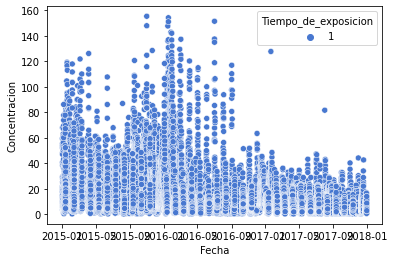

In [ ]:
sns.scatterplot(x="Fecha",y="Concentracion", hue="Tiempo_de_exposicion",palette="muted",data=DFSO2)

### Análisis variable Radiación Solar Global

In [ ]:
RS = Analisis_k['Variable'] == "Radiación Solar Global"
DFRS=Analisis_k[RS]
DFRS=DFRS[DFRS.Concentracion.notnull()] # no se tienen en cuenta los valores nulos
DFRS

,Fecha,Nombre_de_la_estacion,Tecnologia,Tipo_de_estacion,Tiempo_de_exposicion,Variable,Unidades,Concentracion
12034302,2011-01-01 02:00:00,Kennedy,Automática,Fija,1,Radiación Solar Global,W/m2,0.0
12034303,2011-01-01 03:00:00,Kennedy,Automática,Fija,1,Radiación Solar Global,W/m2,0.0
12034304,2011-01-01 04:00:00,Kennedy,Automática,Fija,1,Radiación Solar Global,W/m2,0.0
12034305,2011-01-01 05:00:00,Kennedy,Automática,Fija,1,Radiación Solar Global,W/m2,0.0
12034306,2011-01-01 06:00:00,Kennedy,Automática,Fija,1,Radiación Solar Global,W/m2,0.0
...,...,...,...,...,...,...,...,...
12084137,2017-12-31 19:00:00,Kennedy,Automática,Fija,1,Radiación Solar Global,W/m2,9.0
12084138,2017-12-31 20:00:00,Kennedy,Automática,Fija,1,Radiación Solar Global,W/m2,0.0
12084139,2017-12-31 21:00:00,Kennedy,Automática,Fija,1,Radiación Solar Global,W/m2,0.0
12084140,2017-12-31 22:00:00,Kennedy,Automática,Fija,1,Radiación Solar Global,W/m2,0.0


In [ ]:
DFRS.describe()

,Tiempo_de_exposicion,Concentracion
count,49840.0,49840.000000
mean,1.0,163.781180
std,0.0,235.291454
min,1.0,-1.000000
25%,1.0,0.000000
50%,1.0,8.000000
75%,1.0,285.000000
max,1.0,1099.000000


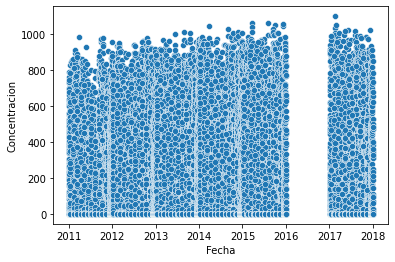

In [ ]:
sns.scatterplot(x="Fecha",y="Concentracion", palette="light:m_r",data=DFRS)